In [4]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN


# **3. Modeling**

# Importação do *dataset* normalizado

In [6]:
data_path = '../data/' #if os.path.exists('../data/') #else 'https://raw.githubusercontent.com/TheAwesomeGe/DECD/main/data/'

cvd_df_processed = pd.read_csv(data_path + 'CVD_normalized_discretized_processed.csv')

# Separar atributos (X) e o alvo (y)
X = cvd_df_processed.drop(columns=['Heart_Disease'])  # Substitua 'Heart_Disease' pelo nome exato do atributo alvo, se for diferente
y = cvd_df_processed['Heart_Disease']

# Divisão dos dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Algoritmos de Aprendizagem Supervisionada

## *Decision Trees*

Acurácia do modelo Decision Tree: 0.92

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56774
           1       0.53      0.03      0.06      4997

    accuracy                           0.92     61771
   macro avg       0.73      0.51      0.51     61771
weighted avg       0.89      0.92      0.89     61771



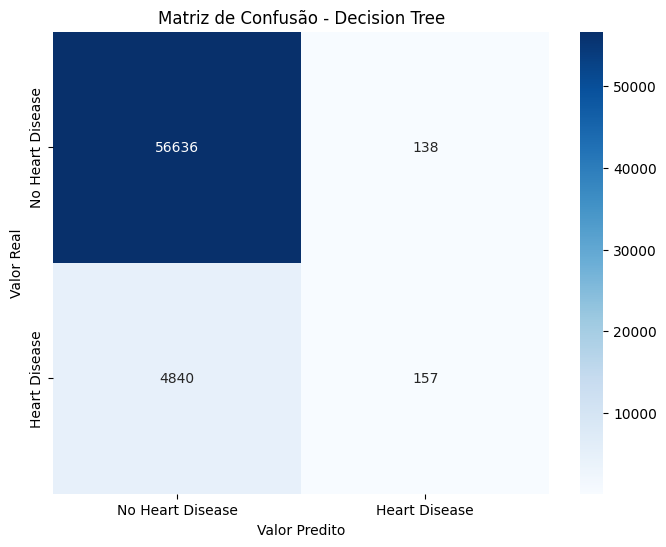


Importância dos Atributos:
                              Importância
Age_Category                     0.512911
Diabetes                         0.188065
General_Health                   0.159313
Sex                              0.108980
Arthritis                        0.019507
Smoking_History                  0.006580
Depression                       0.003513
Other_Cancer                     0.001131
Checkup                          0.000000
Exercise                         0.000000
Skin_Cancer                      0.000000
Height_(cm)                      0.000000
Weight_(kg)                      0.000000
BMI                              0.000000
Alcohol_Consumption              0.000000
Fruit_Consumption                0.000000
Green_Vegetables_Consumption     0.000000
FriedPotato_Consumption          0.000000


In [22]:
# Inicializar o modelo Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)  # Ajuste max_depth conforme necessário

# Treinar o modelo com os dados de treino
dt_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = dt_model.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo Decision Tree: {accuracy:.2f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title("Matriz de Confusão - Decision Tree")
plt.ylabel("Valor Real")
plt.xlabel("Valor Predito")
plt.show()

# Importância dos atributos
feature_importances = pd.DataFrame(dt_model.feature_importances_, index=X.columns, columns=['Importância'])
feature_importances = feature_importances.sort_values(by='Importância', ascending=False)
print("\nImportância dos Atributos:")
print(feature_importances)


## *Multi-Layer Perception* (MLP)

In [ ]:
# Inicializar o modelo MLP
mlp_model = MLPClassifier(
    hidden_layer_sizes=(100,),  # Uma camada oculta com 100 neurônios
    activation='relu',          # Função de ativação ReLU
    solver='adam',              # Otimizador Adam
    max_iter=300,               # Número máximo de iterações
    random_state=42             # Para reprodutibilidade
)

# Treinar o modelo com os dados de treino
mlp_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_mlp = mlp_model.predict(X_test)

# Avaliar o modelo
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("\nClassification Report:\n", classification_report(y_test, y_pred_mlp))


Accuracy: 0.9187968464166033

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56774
           1       0.48      0.05      0.08      4997

    accuracy                           0.92     61771
   macro avg       0.70      0.52      0.52     61771
weighted avg       0.89      0.92      0.89     61771



## *k-Nearest Neighbors*

In [25]:
# Inicializar o modelo K-NN
knn_model = KNeighborsClassifier(n_neighbors=5)  # Usando 5 vizinhos como padrão

# Treinar o modelo com os dados de treino
knn_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_knn = knn_model.predict(X_test)

# Avaliar o modelo
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))


Accuracy: 0.9109128879247543

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     56774
           1       0.32      0.09      0.14      4997

    accuracy                           0.91     61771
   macro avg       0.62      0.54      0.55     61771
weighted avg       0.88      0.91      0.89     61771



## Comparação dos métodos

In [26]:
# Inicializar os modelos
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=300, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Treinar os modelos
dt_model.fit(X_train, y_train)
mlp_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

# Fazer previsões
y_pred_dt = dt_model.predict(X_test)
y_pred_mlp = mlp_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)

# Calcular a acurácia
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Calcular o Classification Report
report_dt = classification_report(y_test, y_pred_dt, output_dict=True)
report_mlp = classification_report(y_test, y_pred_mlp, output_dict=True)
report_knn = classification_report(y_test, y_pred_knn, output_dict=True)

# Organizar os resultados
results = {
    'Model': ['Decision Trees', 'MLP', 'K-NN'],
    'Accuracy': [accuracy_dt, accuracy_mlp, accuracy_knn],
    'Precision (CVD = Yes)': [report_dt['1']['precision'], report_mlp['1']['precision'], report_knn['1']['precision']],
    'Recall (CVD = Yes)': [report_dt['1']['recall'], report_mlp['1']['recall'], report_knn['1']['recall']],
    'F1-Score (CVD = Yes)': [report_dt['1']['f1-score'], report_mlp['1']['f1-score'], report_knn['1']['f1-score']],
    'Precision (CVD = No)': [report_dt['0']['precision'], report_mlp['0']['precision'], report_knn['0']['precision']],
    'Recall (CVD = No)': [report_dt['0']['recall'], report_mlp['0']['recall'], report_knn['0']['recall']],
    'F1-Score (CVD = No)': [report_dt['0']['f1-score'], report_mlp['0']['f1-score'], report_knn['0']['f1-score']],
}

# Criar o DataFrame
results_df = pd.DataFrame(results)

# Exibir a tabela com as métricas
print(results_df)


            Model  Accuracy  Precision (CVD = Yes)  Recall (CVD = Yes)  \
0  Decision Trees  0.919412               0.532203            0.031419   
1             MLP  0.918797               0.480084            0.045827   
2            K-NN  0.910913               0.323077            0.092455   

   F1-Score (CVD = Yes)  Precision (CVD = No)  Recall (CVD = No)  \
0              0.059335              0.921270           0.997569   
1              0.083668              0.922211           0.995632   
2              0.143768              0.924844           0.982950   

   F1-Score (CVD = No)  
0             0.957903  
1             0.957516  
2             0.953012  


## Conclusão

# Algoritmos de Aprendizagem Não-Supervisionada

## *k-Means*

## *DBScan*